In [1]:
import pandas as pd
%matplotlib inline

In [2]:
topfile = '/home/ellery/wikimedia/data/top_wikidata_entities/top_10k_wikidata_entities.tsv'
top = pd.read_csv(topfile, sep = '\t', encoding = 'utf8', names = ['id', 'cat', 'title'])

In [3]:
exist_file = '/home/ellery/missing_and_exisiting_for_top_50_langs_reduced.tsv'
header = ['id', 'num_present', 'num_missing', 'title', 'exist_codes', 'non_exist_codes', 'titles']
ex = pd.read_csv(exist_file, sep = '\t', encoding = 'utf8', names = header)

In [4]:
ex.head()

,id,num_present,num_missing,title,exist_codes,non_exist_codes,titles
0,Q15,48,2,en:Africa,ar|bg|ca|ceb|cs|da|de|el|en|eo|es|et|eu|fa|fi|...,min|vo,NaN
1,Q17,50,0,en:Japan,ar|bg|ca|ceb|cs|da|de|el|en|eo|es|et|eu|fa|fi|...,NaN,NaN
2,Q18,48,2,en:South America,ar|bg|ca|ceb|cs|da|de|el|en|eo|es|et|eu|fa|fi|...,min|vo,NaN
3,Q20,49,1,en:Norway,ar|bg|ca|ceb|cs|da|de|el|en|eo|es|et|eu|fa|fi|...,min,NaN
4,Q21,50,0,en:England,ar|bg|ca|ceb|cs|da|de|el|en|eo|es|et|eu|fa|fi|...,NaN,NaN


In [5]:
top.head()

,id,cat,title
0,Q104340,People/Entertainers/Actors_and_Actresses/Silen...,Harold Lloyd
0,Q104183,People/Entertainers/Actors_and_Actresses/Silen...,Lillian Gish
0,Q103949,People/Entertainers/Actors_and_Actresses/Silen...,Buster Keaton
0,Q104109,People/Entertainers/Actors_and_Actresses/Silen...,Mary Pickford
0,Q229232,People/Entertainers/Actors_and_Actresses/Silen...,Gloria Swanson


In [6]:
df = top.merge(ex, on = 'id', how = 'inner') 

In [7]:
df.shape

(9999, 9)

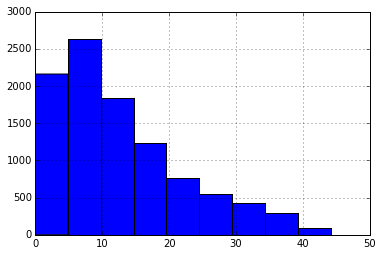

In [8]:
df['num_missing'].hist()

In [9]:
df['num_missing'].sum()

126274

In [10]:
wikis_by_size = [
'en',
'sv',
'de',
'nl',
'fr',
'war',
'ru',
'ceb',
'it',
'es',
'vi',
'pl',
'ja',
'pt',
'zh',
'uk',
'ca',
'fa',
'sh',
'no',
'fi',
'ar',
'id',
'ro',
'cs',
'hu',
'sr',
'ko',
'ms',
'tr',
'min',
'eo',
'kk',
'eu',
'da',
'sk',
'bg',
'he',
'hy',
'lt',
'sl',
'et',
'uz',
'gl',
'nn',
'vo',
'la',
'simple',
'el',
'hi'
]

In [11]:
for n in range(5, 51,5):
    wiki_set = set(wikis_by_size[:n])
    def count(x):
        return len(wiki_set.intersection(set(x.split('|'))))

    print 'Top %d' % n, df[df['non_exist_codes'].notnull()]['non_exist_codes'].apply(count).sum()

Top 5 2102
Top 10 16549
Top 15 21548
Top 20 28593
Top 25 35945
Top 30 48136
Top 35 69616
Top 40 83649
Top 45 104165
Top 50 123668


In [37]:
ex = ex[ex['num_present'] > 0]

In [45]:
(ex['num_present'].value_counts()) #/ float(ex.shape[0])) #[:5].sum()

1     9146145
2     1932447
3     1239880
4      800657
5      419786
6      247182
7      182698
8      118333
9       84664
10      70664
11      59621
12      48965
13      40471
14      36070
15      30855
16      26549
17      22367
19      21975
18      21707
20      21483
21      21377
22      19715
23      17556
24      14141
25      10809
26       8076
27       6560
28       5695
29       5033
30       4658
31       4301
32       3970
33       3789
34       3504
35       3400
36       3036
37       3031
38       2888
39       2493
40       2296
41       2189
42       2023
43       1784
47       1591
44       1570
49       1454
45       1309
46       1289
48       1042
50        199
dtype: int64

In [26]:
ex.shape

(15368716, 7)

In [27]:
3654705./ 15368716 

0.2378015834244058

In [30]:
1932447 /15368716.

0.1257390012282093

In [ ]:
9146145 